<a href="https://colab.research.google.com/github/0223yunhui/AIpython/blob/main/250523.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('example_data.csv')
print(df)

    학번    이름   학년   점수 분반  공부시간
0    1  신사임당  NaN   69  B     4
1    2   홍길동  1.0   92  B     3
2    3   강감찬  4.0   91  C    20
3    4   강감찬  2.0   70  C     5
4    5   강감찬  3.0   83  C     5
5    6   이순신  4.0   95  A     0
6    7   강감찬  4.0   71  C     1
7    8   김유신  NaN   88  B     5
8    9  신사임당  3.0   94  A     9
9   10   홍길동  NaN   60  B     3
10  11   NaN  1.0  200  C     0
11  12  신사임당  2.0   96  A    20
12  13   김유신  4.0   65  A     0
13  14   NaN  2.0   98  C     1
14  15   홍길동  4.0   77  A     2
15  16   이순신  4.0   75  A     4
16  17   NaN  3.0   64  A     2
17  18   홍길동  4.0   91  A     0
18  19   이순신  1.0  200  A     3
19  20  신사임당  2.0   61  A     2
20  20  신사임당  2.0   61  A     2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학번      21 non-null     int64  
 1   이름      18 non-null     object 
 2   학년      18 non-null     float64
 3   점수      21 non-null     int64  
 4   분반      21 non-null     object 
 5   공부시간    21 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.1+ KB


In [ ]:
df.describe()

In [ ]:
print(df.isnull().sum())

In [ ]:
outliers = df[(df['점수'] > 100) | (df['공부시간'] > 10)]
print(f"이상치 개수: {len(outliers)}")
print(f"이상치 데이터:")
print(outliers)

In [ ]:
print(f"중복 제거 전 데이터프레임 크기: {df.shape}")
duplicated_df=df[df.duplicated(keep=False)]
print(f"완전 중복 행 개수: {len(duplicated_df)}")
print(duplicated_df)

In [5]:
df_cleaned = df.drop_duplicates()
print(f"중복 제거 후 데이터프레임 크기: {df_cleaned.shape}")
print(f"제거된 행 수: {df.duplicated().sum()}")
print(df_cleaned)

중복 제거 후 데이터프레임 크기: (20, 6)
제거된 행 수: 1
    학번    이름   학년   점수 분반  공부시간
0    1  신사임당  NaN   69  B     4
1    2   홍길동  1.0   92  B     3
2    3   강감찬  4.0   91  C    20
3    4   강감찬  2.0   70  C     5
4    5   강감찬  3.0   83  C     5
5    6   이순신  4.0   95  A     0
6    7   강감찬  4.0   71  C     1
7    8   김유신  NaN   88  B     5
8    9  신사임당  3.0   94  A     9
9   10   홍길동  NaN   60  B     3
10  11   NaN  1.0  200  C     0
11  12  신사임당  2.0   96  A    20
12  13   김유신  4.0   65  A     0
13  14   NaN  2.0   98  C     1
14  15   홍길동  4.0   77  A     2
15  16   이순신  4.0   75  A     4
16  17   NaN  3.0   64  A     2
17  18   홍길동  4.0   91  A     0
18  19   이순신  1.0  200  A     3
19  20  신사임당  2.0   61  A     2


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

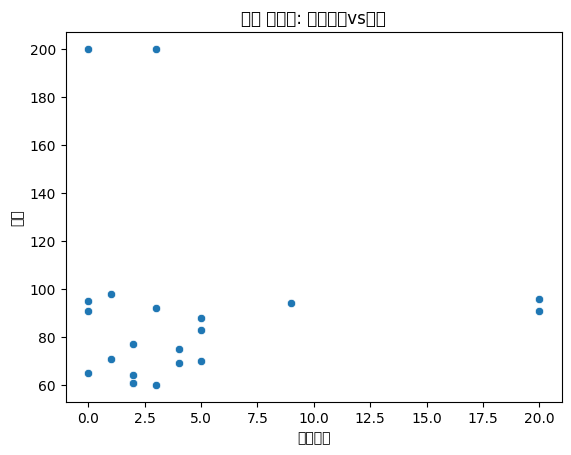

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='공부시간', y='점수', data=df)


plt.title('원본 데이터: 공부시간vs점수')
plt.xlabel('공부시간')
plt.ylabel('점수')

plt.show()

In [15]:
data = pd.Series([10, 11, 12, 13, 14, 15, 100, 101])
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
Lower_Bound = Q1 - 1.5 * IQR
Upper_Bound = Q3 + 1.5 * IQR
print(f"하한 이상치: {Lower_Bound}")
print(f"상한 이상치: {Upper_Bound}")

하한 이상치: -25.0
상한 이상치: 73.0


In [27]:
Q1_score = df['점수'].quantile(0.25)
Q3_score = df['점수'].quantile(0.75)
IQR_score = Q3_score - Q1_score
Lower_Bound_score = Q1_score - 1.5 * IQR_score
Upper_Bound_score = Q3_score + 1.5 * IQR_score

In [36]:
score_outliers = df[(df['점수'] < Lower_Bound_score) | (df['점수'] > Upper_Bound_score)]
print("점수 이상치:")
print(score_outliers)

점수 이상치:
    학번   이름   학년   점수 분반  공부시간
10  11  NaN  1.0  200  C     0
18  19  이순신  1.0  200  A     3


In [66]:
Q1_study = df['공부시간'].quantile(0.25)
Q3_study = df['공부시간'].quantile(0.75)
IQR_study = Q3_study - Q1_study
Lower_Bound_study = Q1_study - 1.5 * IQR_study
Upper_Bound_study = Q3_study + 1.5 * IQR_study

In [67]:
study_outliers = df[((df['공부시간'] < Lower_Bound_study) | (df['공부시간'] > Upper_Bound_study))]
print("공부시간 이상치:")
print(study_outliers)

공부시간 이상치:
    학번    이름   학년  점수 분반  공부시간
2    3   강감찬  4.0  91  C    20
11  12  신사임당  2.0  96  A    20


In [68]:
df_no_outliers = df_no_outliers = df[
   ((df['점수'] >= Lower_Bound_score) & (df['점수'] <= Upper_Bound_score)) &
    ((df['공부시간'] >= Lower_Bound_study) & (df['공부시간'] <= Upper_Bound_study))
    ]
print(df_no_outliers)

    학번    이름   학년  점수 분반  공부시간
0    1  신사임당  NaN  69  B     4
1    2   홍길동  1.0  92  B     3
3    4   강감찬  2.0  70  C     5
4    5   강감찬  3.0  83  C     5
5    6   이순신  4.0  95  A     0
6    7   강감찬  4.0  71  C     1
7    8   김유신  NaN  88  B     5
8    9  신사임당  3.0  94  A     9
9   10   홍길동  NaN  60  B     3
12  13   김유신  4.0  65  A     0
13  14   NaN  2.0  98  C     1
14  15   홍길동  4.0  77  A     2
15  16   이순신  4.0  75  A     4
16  17   NaN  3.0  64  A     2
17  18   홍길동  4.0  91  A     0
19  20  신사임당  2.0  61  A     2
20  20  신사임당  2.0  61  A     2


In [69]:
class_mean = df_no_outliers.groupby('분반')['점수'].mean()
print(class_mean.round(2))

분반
A    75.89
B    77.25
C    80.50
Name: 점수, dtype: float64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


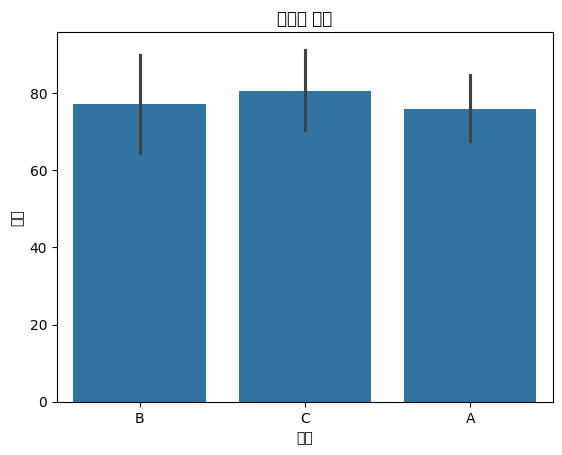

In [70]:
sns.barplot(x='분반', y='점수', data=df_no_outliers)

plt.title('분반별 점수')
plt.xlabel('분반')
plt.ylabel('점수')

plt.show()